# PROJECT - NEW ARTICLE CLASSIFICATION


# DATA SET LINK - https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import os
import itertools
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix
import warnings
from google.colab import drive
warnings.filterwarnings("ignore")
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/My Drive/M.Tech(DSA)/bbc_text.csv")

## Exploratory Data Analysis

In [ ]:
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [ ]:
data['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

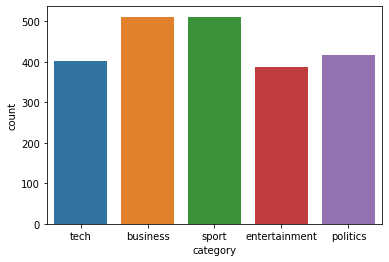

In [ ]:
sns.countplot(data.category)

In [ ]:
tech = pd.DataFrame(data[data["category"]=="tech"]["text"])
tech.head()

,text
0,tv future in the hands of viewers with home th...
19,games maker fights for survival one of britain...
20,security warning over fbi virus the us feder...
21,halo 2 heralds traffic explosion the growing p...
24,mobile audio enters new dimension as mobile ph...


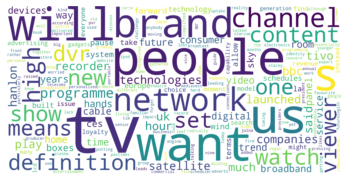

In [ ]:
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'white', width=2000 , height=1000).generate(tech["text"][0])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
business = pd.DataFrame(data[data["category"]=="business"]["text"])
business.head()

,text
1,worldcom boss left books alone former worldc...
11,virgin blue shares plummet 20% shares in austr...
12,crude oil prices back above $50 cold weather a...
15,s korean credit card firm rescued south korea ...
18,japanese banking battle at an end japan s sumi...


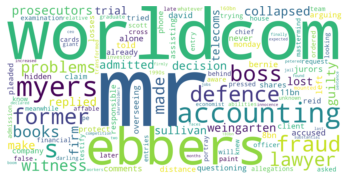

In [ ]:
word_cloud = WordCloud(collocations = False, background_color = 'white', width=2000 , height=1000).generate(business["text"][1])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
sport = pd.DataFrame(data[data["category"]=="sport"]["text"])
sport.head()

,text
2,tigers wary of farrell gamble leicester say ...
3,yeading face newcastle in fa cup premiership s...
7,henman hopes ended in dubai third seed tim hen...
8,wilkinson fit to face edinburgh england captai...
14,moya emotional after davis cup win carlos moya...


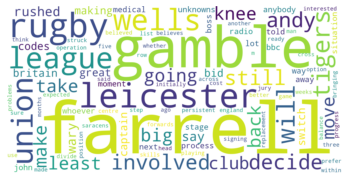

In [ ]:
word_cloud = WordCloud(collocations = False, background_color = 'white', width=2000 , height=1000).generate(sport["text"][2])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
politics = pd.DataFrame(data[data["category"]=="politics"]["text"])
politics.head()

,text
5,howard hits back at mongrel jibe michael howar...
6,blair prepares to name poll date tony blair is...
13,hague given up his pm ambition former conser...
16,howard backs stem cell research michael howard...
28,terror suspects face house arrest uk citizens ...


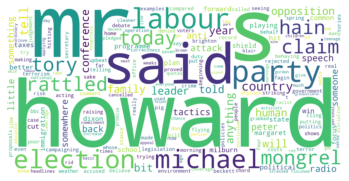

In [ ]:
word_cloud = WordCloud(collocations = False, background_color = 'white', width=2000 , height=1000).generate(politics["text"][5])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
entertainment = pd.DataFrame(data[data["category"]=="entertainment"]["text"])
entertainment.head()

,text
4,ocean s twelve raids box office ocean s twelve...
9,last star wars not for children the sixth an...
10,berlin cheers for anti-nazi film a german movi...
26,career honour for actor dicaprio actor leonard...
29,halloween writer debra hill dies screenwriter ...


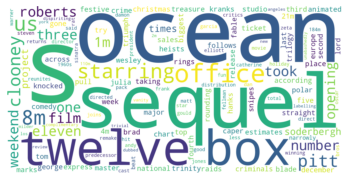

In [ ]:
word_cloud = WordCloud(collocations = False, background_color = 'white', width=2000 , height=1000).generate(entertainment["text"][4])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import re
def decontracted(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [ ]:
from bs4 import BeautifulSoup
from tqdm import tqdm
preprocessed_reviews = []
for sentance in tqdm(data['text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|██████████| 2225/2225 [00:01<00:00, 1626.82it/s]


In [ ]:
print("normal text :- " ,data["text"][0])
print("-"*2000)
print("preprocessed text :- ", preprocessed_reviews[0])

normal text :-  tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being b

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(ngram_range=(1,2), min_df=10, max_features=5000)
final_bigram_counts = count_vect.fit_transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_bigram_counts))
print("the shape of out text BOW vectorizer ",final_bigram_counts.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_bigram_counts.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (2225, 5000)
the number of unique words including both unigrams and bigrams  5000


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tf_idf_vect.fit(preprocessed_reviews)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print('='*50)

final_tf_idf = tf_idf_vect.transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

some sample features(unique words in the corpus) ['abandoned', 'abc', 'ability', 'able', 'able get', 'abn', 'abn amro', 'abroad', 'absence', 'absent']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (2225, 7167)
the number of unique words including both unigrams and bigrams  7167


In [ ]:
X = pd.DataFrame(final_tf_idf.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,7157,7158,7159,7160,7161,7162,7163,7164,7165,7166
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
X['category']= label_encoder.fit_transform(data['category'])
print(X['category'].unique())
print(X.shape)

[4 0 3 1 2]
(2225, 7168)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:,:-2], X.iloc[:,-1], test_size=0.2, random_state=42)

# Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9101123595505618

In [ ]:
X_500_train, X_500_test, y_500_train, y_500_test = train_test_split(X.iloc[:500,:-2], X.iloc[:500,-1], test_size=0.2, random_state=42)
y_500_pred = gnb.fit(X_500_train, y_500_train).predict(X_500_test)
accuracy_score(y_500_test, y_500_pred)

0.83

In [ ]:
X_1000_train, X_1000_test, y_1000_train, y_1000_test = train_test_split(X.iloc[:1000,:-2], X.iloc[:1000,-1], test_size=0.2, random_state=42)
y_1000_pred = gnb.fit(X_1000_train, y_1000_train).predict(X_1000_test)
accuracy_score(y_1000_test, y_1000_pred)

0.87

# Support vector classifier

In [ ]:
from sklearn.svm import SVC
svmclf = SVC(kernel = 'linear',gamma = 'scale', shrinking = False)
svmclf.fit(X_train, y_train)

SVC(kernel='linear', shrinking=False)

In [ ]:
y_pred_svm = svmclf.predict(X_test)
accuracy_score(y_test, y_pred_svm)

0.9662921348314607

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
y_pred_logistic = clf.predict(X_test)
accuracy_score(y_test, y_pred_logistic)

0.9573033707865168

In [ ]:
tf_idf_vect_2_3 = TfidfVectorizer(ngram_range=(2,3), min_df=10)
tf_idf_vect_2_3.fit(preprocessed_reviews)
print("some sample features(unique words in the corpus)",tf_idf_vect_2_3.get_feature_names()[0:10])
print('='*50)

final_tf_idf_2_3 = tf_idf_vect_2_3.transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_tf_idf_2_3))
print("the shape of out text TFIDF vectorizer ",final_tf_idf_2_3.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf_2_3.get_shape()[1])

some sample features(unique words in the corpus) ['able get', 'abn amro', 'ac milan', 'academy awards', 'according analysts', 'according figures', 'according mr', 'according recent', 'according report', 'according reports']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (2225, 1802)
the number of unique words including both unigrams and bigrams  1802


In [ ]:
X_2_3 = pd.DataFrame(final_tf_idf_2_3.toarray())
X_2_3.head()

,0,1,2,3,4,5,6,7,8,9,...,1792,1793,1794,1795,1796,1797,1798,1799,1800,1801
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.248188,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [ ]:
X_2_3['category']= label_encoder.fit_transform(data['category'])
print(X_2_3['category'].unique())
print(X_2_3.shape)

[4 0 3 1 2]
(2225, 1803)


In [ ]:
from sklearn.model_selection import train_test_split
X_2_3_train, X_2_3_test, y_2_3_train, y_2_3_test = train_test_split(X_2_3.iloc[:,:-2], X_2_3.iloc[:,-1], test_size=0.2, random_state=42)

In [ ]:
y_2_3_pred = gnb.fit(X_2_3_train, y_2_3_train).predict(X_2_3_test)
accuracy_score(y_2_3_test, y_2_3_pred)

0.8921348314606742